# Reasonable Suspicion - Terry Stops Prediction  

In 

## Business Understanding 

In [195]:
#Imports
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import tree
from sklearn.metrics import roc_curve, auc


In [104]:
#Import pandas and load the data 

df = pd.read_csv('Data/Terry_Stops_20231018.csv')

### api getting data 



In [105]:
import requests

url = 'https://data.seattle.gov/resource/28ny-9ts8.json'

response = requests.get(url)
json = response.json()
# df = pd.DataFrame(json)
df

,Subject Age Group,Subject ID,GO / SC Num,Terry Stop ID,Stop Resolution,Weapon Type,Officer ID,Officer YOB,Officer Gender,Officer Race,...,Reported Time,Initial Call Type,Final Call Type,Call Type,Officer Squad,Arrest Flag,Frisk Flag,Precinct,Sector,Beat
0,56 and Above,-1,20160000325874,191650,Offense Report,None,6672,1966,M,White,...,17:26:00.0000000,NUISANCE - MISCHIEF,--MISCHIEF OR NUISANCE - GENERAL,ONVIEW,SOUTHWEST PCT OPS - CPT,N,N,Southwest,F,F2
1,26 - 35,-1,20180000368757,488017,Offense Report,None,5350,1964,M,White,...,18:38:00.0000000,-,-,-,PAWN DETAIL,N,N,North,N,N2
2,18 - 25,-1,20150000297988,80973,Offense Report,None,7463,1981,M,White,...,10:55:00.0000000,DIST - IP/JO - DV DIST - NO ASLT,--DV - DOMESTIC VIOLENCE (ARREST DISCRETIONARY),911,SOUTH PCT 1ST W - SAM - PLATOON 2,N,N,South,S,S2
3,18 - 25,-1,20150000294181,77162,Offense Report,None,5288,1960,M,Not Specified,...,12:03:00.0000000,THREATS (INCLS IN-PERSON/BY PHONE/IN WRITING),--DISTURBANCE - OTHER,911,NORTH PCT 1ST W - NORA (JOHN) - PLATOON 1,N,N,North,N,N2
4,26 - 35,-1,20170000004647,315588,Field Contact,None,5438,1958,M,White,...,13:03:00.0000000,-,-,-,SOUTHWEST PCT 2ND W - SOUTHWEST BEATS,N,N,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57725,36 - 45,-1,20160000272248,179204,Offense Report,None,7785,1988,M,Two or More Races,...,18:48:00.0000000,"SUSPICIOUS PERSON, VEHICLE OR INCIDENT",--SUSPICIOUS CIRCUM. - SUSPICIOUS PERSON,911,EAST PCT 2ND W - GEORGE - PLATOON 2,N,N,West,K,K3
57726,36 - 45,-1,20170000004444,311923,Field Contact,None,8315,1986,M,Not Specified,...,09:08:00.0000000,-,-,-,WEST PCT 1ST W - DAVID - PLATOON 1,N,N,-,-,-
57727,26 - 35,-1,20180000073034,394060,Arrest,Handgun,8458,1983,M,White,...,11:39:00.0000000,SHOTS - IP/JO - INCLUDES HEARD/NO ASSAULT,--MISCHIEF OR NUISANCE - GENERAL,911,EAST PCT 1ST W - EDWARD (CHARLIE) - PLATOON 2,N,Y,East,E,E3
57728,46 - 55,-1,20180000299754,469832,Arrest,Handgun,8524,1993,M,White,...,18:13:00.0000000,TRAFFIC - ROAD RAGE,--ASSAULTS - FIREARM INVOLVED,911,SOUTH PCT 2ND W - OCEAN - PLATOON 2,N,Y,West,K,K3


## Data Understanding 

In [106]:
df['Frisk Flag'].value_counts(normalize=True)



N    0.755708
Y    0.236012
-    0.008280
Name: Frisk Flag, dtype: float64

In [107]:
df = pd.read_csv('Data/Terry_Stops_20231018.csv')

In [108]:
df.shape

(57730, 23)

In [109]:
df.columns

Index(['Subject Age Group', 'Subject ID', 'GO / SC Num', 'Terry Stop ID',
       'Stop Resolution', 'Weapon Type', 'Officer ID', 'Officer YOB',
       'Officer Gender', 'Officer Race', 'Subject Perceived Race',
       'Subject Perceived Gender', 'Reported Date', 'Reported Time',
       'Initial Call Type', 'Final Call Type', 'Call Type', 'Officer Squad',
       'Arrest Flag', 'Frisk Flag', 'Precinct', 'Sector', 'Beat'],
      dtype='object')

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57730 entries, 0 to 57729
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Subject Age Group         57730 non-null  object
 1   Subject ID                57730 non-null  int64 
 2   GO / SC Num               57730 non-null  int64 
 3   Terry Stop ID             57730 non-null  int64 
 4   Stop Resolution           57730 non-null  object
 5   Weapon Type               57730 non-null  object
 6   Officer ID                57730 non-null  object
 7   Officer YOB               57730 non-null  int64 
 8   Officer Gender            57730 non-null  object
 9   Officer Race              57730 non-null  object
 10  Subject Perceived Race    57730 non-null  object
 11  Subject Perceived Gender  57730 non-null  object
 12  Reported Date             57730 non-null  object
 13  Reported Time             57730 non-null  object
 14  Initial Call Type     

In [111]:
#Select columns to use for analysis and modelling
usable_features = ['Subject Age Group','Weapon Type', 'Officer Gender','Officer Race', 'Subject Perceived Race',
                    'Subject Perceived Gender', 'Arrest Flag', 'Reported Date', 'Reported Time' ,'Officer YOB']
sub_df = df[usable_features]

In [112]:
sub_df.head()

,Subject Age Group,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Arrest Flag,Reported Date,Reported Time,Officer YOB
0,56 and Above,None,M,White,White,Male,N,2016-09-08T00:00:00Z,17:26:00.0000000,1966
1,26 - 35,None,M,White,White,Female,N,2018-10-02T00:00:00Z,18:38:00.0000000,1964
2,18 - 25,None,M,White,Black or African American,Male,N,2015-08-26T00:00:00Z,10:55:00.0000000,1981
3,18 - 25,None,M,Not Specified,Black or African American,Male,N,2015-08-23T00:00:00Z,12:03:00.0000000,1960
4,26 - 35,None,M,White,White,Male,N,2017-10-06T00:00:00Z,13:03:00.0000000,1958


In [113]:
usable_features[:-4]

['Subject Age Group',
 'Weapon Type',
 'Officer Gender',
 'Officer Race',
 'Subject Perceived Race',
 'Subject Perceived Gender']

In [114]:
val_count = df['Arrest Flag'].value_counts( normalize=True)
f'Leading Value: {val_count.index[0]} with { str(round(val_count.values[0], 2))} %'

'Leading Value: N with 0.9 %'

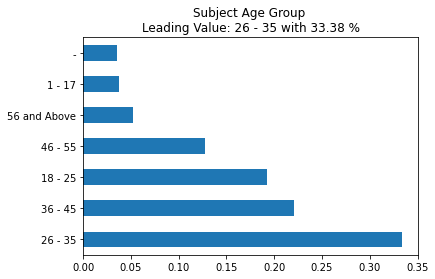

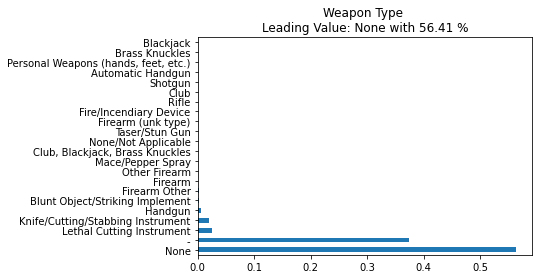

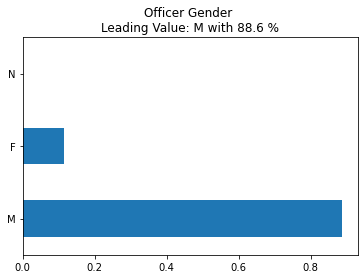

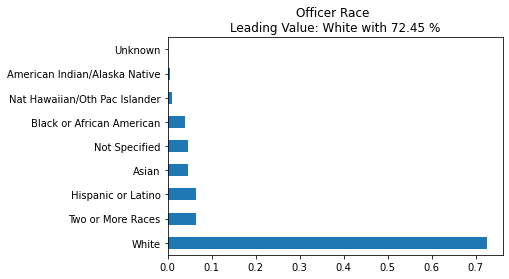

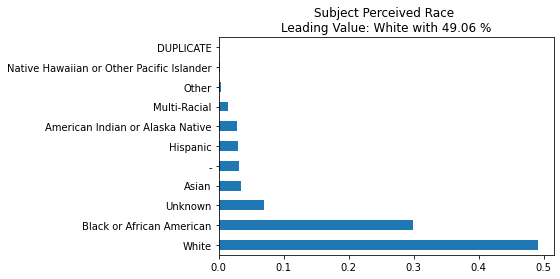

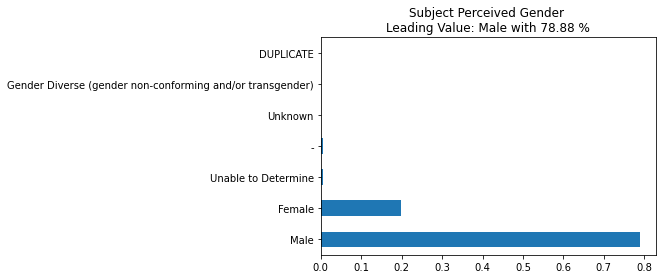

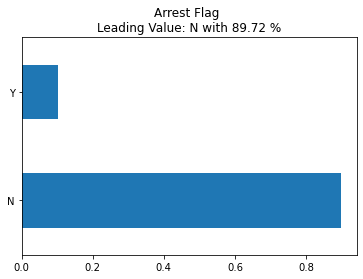

In [115]:
# #Plot value counts of selected independent variables

import matplotlib.pyplot as plt
%matplotlib inline 
for column in usable_features[:-3]:
    val_count = df[column].value_counts( normalize=True)
    val_count.plot.barh(title = f'{column} \nLeading Value: {val_count.index[0]} with { str(round(val_count.values[0]*100, 2))} %')

    # df[column].value_counts( normalize=True).plot.barh(
    #     title = column+f' Leading value: {column}')

    # # val_count = df[column].value_counts( normalize=True)
    
    plt.show()

# plt.show()
    

<ipython-input-116-ff21e265dac1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Reported Date'] = sub_df['Reported Date'].apply ( lambda x: pd.to_datetime(x))
<ipython-input-116-ff21e265dac1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['count'] = 1


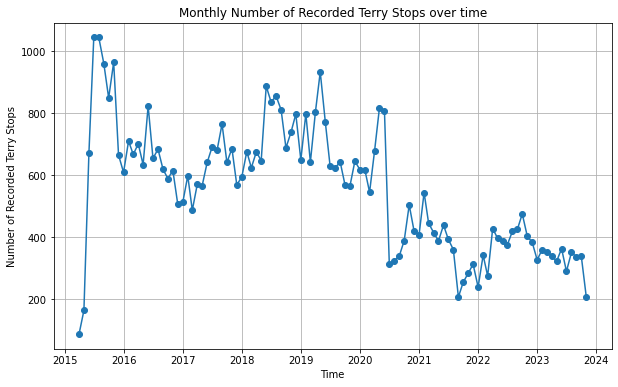

,Subject Age Group,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Arrest Flag,Reported Date,Reported Time,Officer YOB
0,56 and Above,None,M,White,White,Male,N,2016-09-08 00:00:00+00:00,17:26:00.0000000,1966
1,26 - 35,None,M,White,White,Female,N,2018-10-02 00:00:00+00:00,18:38:00.0000000,1964
2,18 - 25,None,M,White,Black or African American,Male,N,2015-08-26 00:00:00+00:00,10:55:00.0000000,1981
3,18 - 25,None,M,Not Specified,Black or African American,Male,N,2015-08-23 00:00:00+00:00,12:03:00.0000000,1960
4,26 - 35,None,M,White,White,Male,N,2017-10-06 00:00:00+00:00,13:03:00.0000000,1958
...,...,...,...,...,...,...,...,...,...,...
57725,36 - 45,None,M,Two or More Races,American Indian or Alaska Native,Male,N,2016-07-29 00:00:00+00:00,18:48:00.0000000,1988
57726,36 - 45,None,M,Not Specified,Black or African American,Male,N,2017-09-23 00:00:00+00:00,09:08:00.0000000,1986
57727,26 - 35,Handgun,M,White,Black or African American,Male,N,2018-02-28 00:00:00+00:00,11:39:00.0000000,1983
57728,46 - 55,Handgun,M,White,White,Male,N,2018-08-12 00:00:00+00:00,18:13:00.0000000,1993


In [116]:
#Plot of Terry stops over time

#convert values to to datetime 
sub_df['Reported Date'] = sub_df['Reported Date'].apply ( lambda x: pd.to_datetime(x))

#resample to aggregate values per day
sub_df['count'] = 1 
daily_counts  = sub_df.resample('M', on='Reported Date')['count'].sum()

#plot
plt.figure(figsize=(10,6))
plt.plot(daily_counts.index, daily_counts.values, marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Number of Recorded Terry Stops')
plt.title('Monthly Number of Recorded Terry Stops over time')
plt.grid(True)
plt.show()

sub_df.drop('count', axis=1)

From the plots above, we can make the following obeservations:
* Most Terry stops (90%) ended up with no arrests. This may suggest class imbalance
* Male subjects were stopped most, at 79%
* People with 'White' as their perceived race were stopped most, at 49%
* Officers with 'White' as race on record made the most stops, at 49%
* The most common subject age group was 26-35 years (33%)

In [117]:
#Check for null values in sub_df
sub_df.isna().sum()

Subject Age Group           0
Weapon Type                 0
Officer Gender              0
Officer Race                0
Subject Perceived Race      0
Subject Perceived Gender    0
Arrest Flag                 0
Reported Date               0
Reported Time               0
Officer YOB                 0
count                       0
dtype: int64

## Data Preparation

In [118]:
#preview data as we have it
sub_df.head()

,Subject Age Group,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Arrest Flag,Reported Date,Reported Time,Officer YOB,count
0,56 and Above,None,M,White,White,Male,N,2016-09-08 00:00:00+00:00,17:26:00.0000000,1966,1
1,26 - 35,None,M,White,White,Female,N,2018-10-02 00:00:00+00:00,18:38:00.0000000,1964,1
2,18 - 25,None,M,White,Black or African American,Male,N,2015-08-26 00:00:00+00:00,10:55:00.0000000,1981,1
3,18 - 25,None,M,Not Specified,Black or African American,Male,N,2015-08-23 00:00:00+00:00,12:03:00.0000000,1960,1
4,26 - 35,None,M,White,White,Male,N,2017-10-06 00:00:00+00:00,13:03:00.0000000,1958,1


#### Re-Group Weapon Type column

In [119]:
#Have a look again at the Weapon Type Column
sub_df['Weapon Type'].value_counts( normalize=True)

None                                    0.564091
-                                       0.373307
Lethal Cutting Instrument               0.025671
Knife/Cutting/Stabbing Instrument       0.020197
Handgun                                 0.006444
Blunt Object/Striking Implement         0.002616
Firearm Other                           0.001732
Firearm                                 0.001611
Other Firearm                           0.001057
Mace/Pepper Spray                       0.000918
Club, Blackjack, Brass Knuckles         0.000849
None/Not Applicable                     0.000277
Taser/Stun Gun                          0.000260
Firearm (unk type)                      0.000260
Fire/Incendiary Device                  0.000208
Rifle                                   0.000173
Club                                    0.000156
Shotgun                                 0.000069
Automatic Handgun                       0.000035
Personal Weapons (hands, feet, etc.)    0.000035
Brass Knuckles      

From the info above, the Weapon Type column is heavily skewed and to reduce the number of resultant columns when we use one hot encoding, we can group weapons that were much less common as 'Others' as below:

In [120]:
common_weapons = ['None', '-', 'Lethal Cutting Instrument', 'Knife/Cutting/Stabbing Instrument' ]
sub_df['Weapon Type'] = sub_df['Weapon Type'].apply( lambda x: np.where(x in common_weapons,
                                 x, 'Others'))

sub_df['Weapon Type'].value_counts( normalize=True)

<ipython-input-120-03d99ec70b4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Weapon Type'] = sub_df['Weapon Type'].apply( lambda x: np.where(x in common_weapons,


None                                 0.564091
-                                    0.373307
Lethal Cutting Instrument            0.025671
Knife/Cutting/Stabbing Instrument    0.020197
Others                               0.016733
Name: Weapon Type, dtype: float64

It is unclear from the dataset what '-' as a weapon type means and while I'd like to group it with 'None', comparing the resulting numner of arrests from None and '-' suggest they have different meanings. See below:

In [121]:
print(sub_df[sub_df['Weapon Type'] == 'None']['Arrest Flag'].value_counts(normalize= True))
print(sub_df[sub_df['Weapon Type'] == '-']['Arrest Flag'].value_counts(normalize= True))

N    1.0
Name: Arrest Flag, dtype: float64
N    0.757877
Y    0.242123
Name: Arrest Flag, dtype: float64


About a quarter of weapon type '-' led to arrests (all other factors held constant), so we'll keep the value.

### Convert Reported Date column to weekday or weekend 

In [122]:
#Convert reported date into weekday or weekend 

sub_df['Reported Date'] = sub_df['Reported Date'].apply( lambda x: np.where(x.weekday() > 5, 'Weekend', 'Weekday'))
sub_df['Reported Date'].head()

<ipython-input-122-c3071561bdca>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Reported Date'] = sub_df['Reported Date'].apply( lambda x: np.where(x.weekday() > 5, 'Weekend', 'Weekday'))


0    Weekday
1    Weekday
2    Weekday
3    Weekend
4    Weekday
Name: Reported Date, dtype: object

### Convert Reported Time column into part of day


In [123]:
def get_part_of_day(col): 
    hr = pd.to_datetime(col).hour
    return (
        "morning" if 5 <= hr <= 11
        else
        "afternoon" if 12 <= hr <= 17
        else
        "evening" if 18 <= hr <= 22
        else
        "night"
    )

In [124]:
#convert reported time into period of the day
sub_df['Reported Time'] = sub_df['Reported Time'].apply(lambda x: get_part_of_day(x))
sub_df['Reported Time'].head()

<ipython-input-124-710a1919e305>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Reported Time'] = sub_df['Reported Time'].apply(lambda x: get_part_of_day(x))


0    afternoon
1      evening
2      morning
3    afternoon
4    afternoon
Name: Reported Time, dtype: object

### Convert Arrest Flag Column into 0 or 1

In [125]:
sub_df['Arrest Flag'] = (sub_df['Arrest Flag'] == 'Y').astype(int)

<ipython-input-125-8aef256dbebe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Arrest Flag'] = (sub_df['Arrest Flag'] == 'Y').astype(int)


In [126]:
cat_columns = ['Subject Age Group',
 'Weapon Type',
 'Officer Gender',
 'Officer Race',
 'Subject Perceived Race',
 'Subject Perceived Gender',
 'Reported Date',
 'Reported Time']

In [127]:
sub_df

,Subject Age Group,Weapon Type,Officer Gender,Officer Race,Subject Perceived Race,Subject Perceived Gender,Arrest Flag,Reported Date,Reported Time,Officer YOB,count
0,56 and Above,None,M,White,White,Male,0,Weekday,afternoon,1966,1
1,26 - 35,None,M,White,White,Female,0,Weekday,evening,1964,1
2,18 - 25,None,M,White,Black or African American,Male,0,Weekday,morning,1981,1
3,18 - 25,None,M,Not Specified,Black or African American,Male,0,Weekend,afternoon,1960,1
4,26 - 35,None,M,White,White,Male,0,Weekday,afternoon,1958,1
...,...,...,...,...,...,...,...,...,...,...,...
57725,36 - 45,None,M,Two or More Races,American Indian or Alaska Native,Male,0,Weekday,evening,1988,1
57726,36 - 45,None,M,Not Specified,Black or African American,Male,0,Weekday,morning,1986,1
57727,26 - 35,Others,M,White,Black or African American,Male,0,Weekday,morning,1983,1
57728,46 - 55,Others,M,White,White,Male,0,Weekend,evening,1993,1


## Feature Engineering

In [128]:
#separate target and independent variables
# all columns are categorical
y = sub_df['Arrest Flag']
X = sub_df[cat_columns]

In [129]:
#split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.25, random_state = 42)


In [130]:
X_train = pd.get_dummies(X_train, drop_first=True)
X_train

,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Weapon Type_Knife/Cutting/Stabbing Instrument,Weapon Type_Lethal Cutting Instrument,Weapon Type_None,Weapon Type_Others,...,Subject Perceived Gender_DUPLICATE,Subject Perceived Gender_Female,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_Male,Subject Perceived Gender_Unable to Determine,Subject Perceived Gender_Unknown,Reported Date_Weekend,Reported Time_evening,Reported Time_morning,Reported Time_night
46372,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12537,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
20177,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
27838,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
5222,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13304,0,1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
56825,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
40798,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,1,0
49712,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [131]:
X_train.head()

,Subject Age Group_1 - 17,Subject Age Group_18 - 25,Subject Age Group_26 - 35,Subject Age Group_36 - 45,Subject Age Group_46 - 55,Subject Age Group_56 and Above,Weapon Type_Knife/Cutting/Stabbing Instrument,Weapon Type_Lethal Cutting Instrument,Weapon Type_None,Weapon Type_Others,...,Subject Perceived Gender_DUPLICATE,Subject Perceived Gender_Female,Subject Perceived Gender_Gender Diverse (gender non-conforming and/or transgender),Subject Perceived Gender_Male,Subject Perceived Gender_Unable to Determine,Subject Perceived Gender_Unknown,Reported Date_Weekend,Reported Time_evening,Reported Time_morning,Reported Time_night
46372,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12537,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
20177,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
27838,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
5222,0,0,0,0,1,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,1


In [ ]:
#get dummies for X_test
X_test = pd.get_dummies(X_test, drop_first=True)

## Modelling 

#### Logistic Regression Model

In [196]:

# Fit a model
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')
logreg.fit(X_train, y_train)
print(logreg) # Preview model params

# Predict
y_pred = logreg.predict(X_test)

y_score = logreg.fit(X_train, y_train).decision_function(X_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_score)

print('AUC: {}'.format(auc(false_positive_rate, true_positive_rate)))


LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')
AUC: 0.8689430013772563


### Baseline Model: Decision Tree

In [155]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
#get predictions on X_test
preds = clf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds, = roc_curve(y_test, preds)
roc_auc= auc (false_positive_rate, true_positive_rate)
print(f"Area under the curve: {roc_auc}")

Area under the curve: 0.5296221787725497


Area under the curve: 0.5286879355996011


#### Decision Tree Hyperparameter tuning

Finding optimal tree depth: 

In [142]:
y_train.values

array([0, 1, 0, ..., 0, 0, 0])

In [144]:
#try running through 1-30 as max_depth to find optimal value
max_depth =list(range (1, 31))
train_results = []
test_results = []
for i in max_depth:
    # initiate classifier and fit to training set
    clf = DecisionTreeClassifier(criterion= 'entropy', max_depth= i , random_state= 1)
    clf.fit(X_train, y_train)
    #predict train set and add results to train results
    train_preds = clf.predict(X_train)
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, train_preds)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    #predict the test set and add results to test results
    test_pred = clf.predict(X_test)
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, test_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)




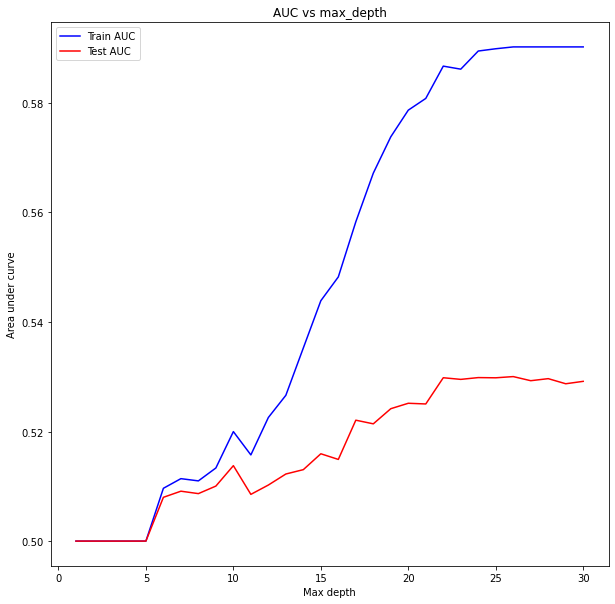

In [190]:
#plot above results
plt.figure(figsize= (10,10))
plt.plot(max_depth, train_results, color = 'b', label = 'Train AUC')
plt.plot(max_depth, test_results, color = 'r', label = "Test AUC")
# plt.ylim(0,1)
plt.xlabel("Max depth")
plt.ylabel("Area under curve")
plt.title("AUC vs max_depth")
plt.legend()
plt.show()


From the graph above,the train AUC value keeps rising as expected while the model learns more and more about the training data. The test AUC rises up to about 6 and later at around 10 before both sharply fall. Here, I pick 10 as the optimal max depth. It is worth noting that the AUC value is still under 60%, so this may not be considered a very good classifier (at least not yet). 
Below, creating a model with 10 as the max_dep

In [194]:
# Create the classifier, fit it on the training data and make predictions on the test set
clf = DecisionTreeClassifier(criterion='entropy', max_depth=12)
clf.fit(X_train, y_train)
#get predictions on X_test
preds = clf.predict(X_test)
false_positive_rate, true_positive_rate, thresholds, = roc_curve(y_test, preds)
roc_auc= auc (false_positive_rate, true_positive_rate)
print(f"Area under the curve: {roc_auc}")

Area under the curve: 0.5102739412179735


## Evaluation 